In [1]:
import pandas as pd
import numpy as np

# Set the random seed for reproducibility
np.random.seed(2102)

# Load the data from the CSV file
file_path = 'data/promotions.csv'
promotions_df = pd.read_csv(file_path)

# Sample 6 random rows and sort them by 'id'
sampled_df = promotions_df.sample(n=6).sort_values('id')
sampled_df

,id,decision,gender
1,2,promoted,male
6,7,promoted,male
23,24,promoted,female
28,29,promoted,female
30,31,promoted,female
33,34,promoted,female


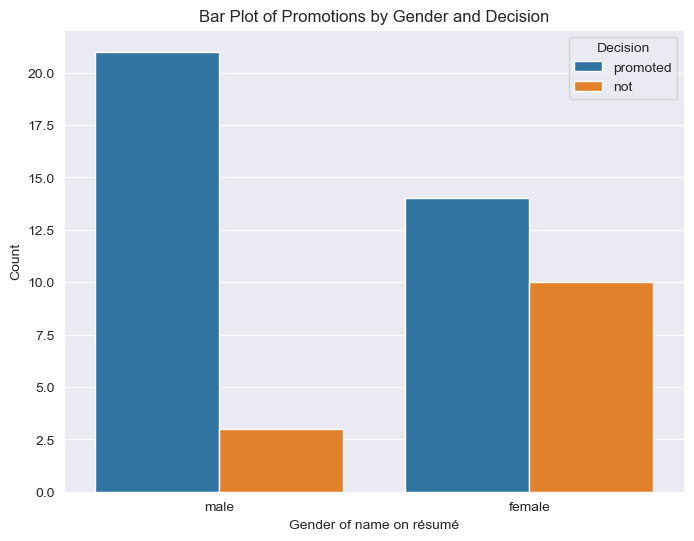

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the promotions dataset
# Note: Assuming promotions_df is already loaded as shown in the previous Python code.

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=promotions_df, x='gender', hue='decision')

# Set labels
plt.xlabel('Gender of name on résumé')
plt.ylabel('Count')
plt.title('Bar Plot of Promotions by Gender and Decision')
plt.legend(title='Decision')

# Show the plot
plt.show()

In [3]:
# Group by 'gender' and 'decision', then count the occurrences
grouped_df = promotions_df.groupby(['gender', 'decision']).size().reset_index(name='count')
grouped_df

,gender,decision,count
0,female,not,10
1,female,promoted,14
2,male,not,3
3,male,promoted,21


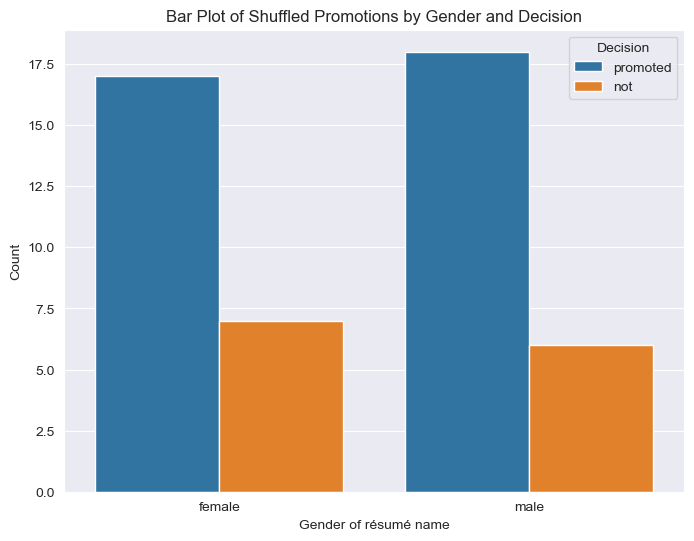

In [4]:
# Load the shuffled promotions dataset
file_path_shuffled = 'data/promotions_shuffled.csv'
promotions_shuffled_df = pd.read_csv(file_path_shuffled)

# Create a bar plot using seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=promotions_shuffled_df, x='gender', hue='decision')

# Set labels
plt.xlabel('Gender of résumé name')
plt.ylabel('Count')
plt.title('Bar Plot of Shuffled Promotions by Gender and Decision')
plt.legend(title='Decision')

# Show the plot
plt.show()


In [5]:
# Group by 'gender' and 'decision' in the shuffled dataset, then count the occurrences
grouped_shuffled_df = promotions_shuffled_df.groupby(['gender', 'decision']).size().reset_index(name='count')
grouped_shuffled_df

,gender,decision,count
0,female,not,7
1,female,promoted,17
2,male,not,6
3,male,promoted,18


In [6]:
# Calculate the proportions of 'promoted' for each gender
promoted_counts = promotions_df[promotions_df['decision'] == 'promoted']['gender'].value_counts()
total_counts = promotions_df['gender'].value_counts()

# Calculate proportions
proportions = promoted_counts / total_counts

# Calculate the observed difference in proportions
obs_diff_prop = proportions['male'] - proportions['female']
obs_diff_prop

0.29166666666666663

In [7]:
import numpy as np

# Set the seed for reproducibility
np.random.seed(2019)

# Function to calculate the difference in proportions
def diff_in_proportions(data):
    promoted_counts = data[data['decision'] == 'promoted']['gender'].value_counts()
    total_counts = data['gender'].value_counts()
    proportions = promoted_counts / total_counts
    return proportions['male'] - proportions['female']

# Permute and calculate the statistic 33 times
permuted_stats = []
for _ in range(33):
    # Permute the 'decision' column
    shuffled_decision = np.random.permutation(promotions_df['decision'])
    shuffled_df = promotions_df.copy()
    shuffled_df['decision'] = shuffled_decision
    
    # Calculate and store the statistic
    stat = diff_in_proportions(shuffled_df)
    permuted_stats.append(stat)

permuted_stats

[0.04166666666666663,
 0.04166666666666663,
 -0.04166666666666663,
 -0.125,
 0.04166666666666663,
 -0.04166666666666663,
 0.04166666666666663,
 -0.04166666666666663,
 0.04166666666666663,
 -0.04166666666666663,
 -0.20833333333333337,
 0.20833333333333337,
 -0.04166666666666663,
 -0.125,
 -0.04166666666666663,
 0.125,
 0.04166666666666663,
 0.04166666666666663,
 -0.20833333333333337,
 -0.125,
 0.125,
 0.125,
 0.20833333333333337,
 0.04166666666666663,
 0.125,
 0.20833333333333337,
 -0.125,
 -0.29166666666666663,
 -0.04166666666666663,
 -0.04166666666666663,
 -0.20833333333333337,
 -0.04166666666666663,
 -0.125]

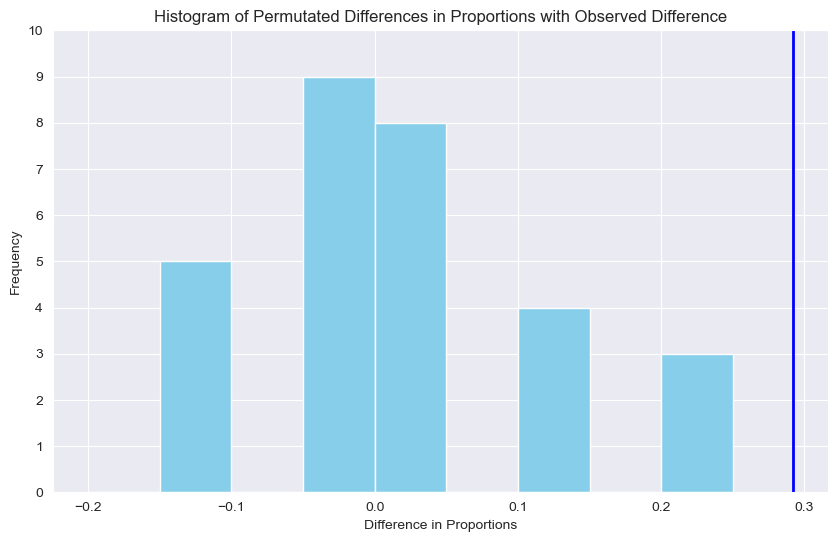

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Set the seed for reproducibility
np.random.seed(2019)

# Function to calculate the difference in proportions
def diff_in_proportions(data):
    promoted_counts = data[data['decision'] == 'promoted']['gender'].value_counts()
    total_counts = data['gender'].value_counts()
    proportions = promoted_counts / total_counts
    return proportions['male'] - proportions['female']

# Permute and calculate the statistic 33 times
permuted_stats = []
for _ in range(33):
    # Permute the 'decision' column
    shuffled_decision = np.random.permutation(promotions_df['decision'])
    shuffled_df = promotions_df.copy()
    shuffled_df['decision'] = shuffled_decision
    
    # Calculate and store the statistic
    stat = diff_in_proportions(shuffled_df)
    permuted_stats.append(stat)

# Plotting the histogram and vertical line for observed difference
plt.figure(figsize=(10, 6))
plt.hist(permuted_stats, bins=np.arange(-0.2, max(permuted_stats) + 0.05, 0.05), color='skyblue', edgecolor='white')
plt.axvline(x=obs_diff_prop, color='blue', linewidth=2)

# Adjusting y-axis scale
plt.yticks(range(0, 11))

# Setting labels
plt.xlabel('Difference in Proportions')
plt.ylabel('Frequency')
plt.title('Histogram of Permutated Differences in Proportions with Observed Difference')
plt.show()

In [10]:
# Define the response (y) and explanatory (x) variables
y = promotions_df['decision'] == 'promoted'  # This creates a boolean series where 'promoted' is True
x = promotions_df['gender']
x

0       male
1       male
2       male
3       male
4       male
5       male
6       male
7       male
8       male
9       male
10      male
11      male
12      male
13      male
14      male
15      male
16      male
17      male
18      male
19      male
20      male
21    female
22    female
23    female
24    female
25    female
26    female
27    female
28    female
29    female
30    female
31    female
32    female
33    female
34    female
35      male
36      male
37      male
38    female
39    female
40    female
41    female
42    female
43    female
44    female
45    female
46    female
47    female
Name: gender, dtype: object

In [12]:
from scipy.stats import chi2_contingency

# Creating a contingency table
contingency_table = pd.crosstab(promotions_df['gender'], promotions_df['decision'])

# Performing the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# You can now use the p-value (p) to make decisions regarding the null hypothesis
chi2, p, dof, expected

(3.7978021978021976,
 0.05131990358807137,
 1,
 array([[ 6.5, 17.5],
        [ 6.5, 17.5]]))

In [15]:
import numpy as np

# Set a seed for reproducibility, if desired
np.random.seed(123)  # Example seed

# Function to calculate the difference in proportions
def diff_in_proportions(data):
    promoted_counts = data[data['decision'] == 'promoted']['gender'].value_counts()
    total_counts = data['gender'].value_counts()
    proportions = promoted_counts / total_counts
    return proportions['male'] - proportions['female']

# Permute and calculate the statistic 1000 times
permuted_stats = []
for _ in range(1000):
    # Permute the 'decision' column
    shuffled_decision = np.random.permutation(promotions_df['decision'])
    shuffled_df = promotions_df.copy()
    shuffled_df['decision'] = shuffled_decision
    
    # Calculate and store the statistic
    stat = diff_in_proportions(shuffled_df)
    permuted_stats.append(stat)

# permuted_stats now contains the statistic of interest for 1000 permutations
permuted_stats

[-0.125,
 0.125,
 -0.125,
 0.04166666666666663,
 -0.125,
 0.04166666666666663,
 -0.125,
 0.125,
 0.20833333333333337,
 0.125,
 -0.125,
 -0.125,
 0.125,
 -0.20833333333333337,
 -0.20833333333333337,
 0.04166666666666663,
 -0.125,
 -0.04166666666666663,
 0.04166666666666663,
 -0.04166666666666663,
 -0.20833333333333337,
 0.04166666666666663,
 0.125,
 0.125,
 0.125,
 0.04166666666666663,
 -0.20833333333333337,
 -0.04166666666666663,
 0.04166666666666663,
 -0.125,
 0.04166666666666663,
 -0.20833333333333337,
 0.20833333333333337,
 -0.20833333333333337,
 -0.29166666666666663,
 -0.04166666666666663,
 0.125,
 0.04166666666666663,
 -0.04166666666666663,
 0.04166666666666663,
 -0.125,
 -0.125,
 0.125,
 0.04166666666666663,
 0.125,
 0.04166666666666663,
 -0.20833333333333337,
 0.04166666666666663,
 -0.20833333333333337,
 -0.125,
 -0.04166666666666663,
 0.20833333333333337,
 -0.04166666666666663,
 -0.20833333333333337,
 -0.04166666666666663,
 -0.125,
 0.04166666666666663,
 0.04166666666666663,
 -

In [14]:
# Number of rows in promotions_generate
num_rows = len(permuted_stats)  # Since permuted_stats contains the results of 1000 permutations
num_rows

1000

In [20]:
# Display the first few rows of the promotions dataset with 'decision' and 'gender' columns
print(promotions_df[['decision', 'gender']].shape)
promotions_df[['decision', 'gender']].head(10)

(48, 2)


,decision,gender
0,promoted,male
1,promoted,male
2,promoted,male
3,promoted,male
4,promoted,male
5,promoted,male
6,promoted,male
7,promoted,male
8,promoted,male
9,promoted,male


In [25]:
# Adjusting the function to include a replicate column
def perform_permutation_with_replicate(data, replicate_num):
    shuffled_decision = np.random.permutation(data['decision'])
    permuted_df = data.copy()
    permuted_df['decision'] = shuffled_decision
    permuted_df['replicate'] = replicate_num
    return permuted_df

# Generate 1000 permutations with replicate numbers
promotions_generate_with_replicate = [perform_permutation_with_replicate(promotions_df, i + 1) for i in range(1000)]

# Concatenate all DataFrames into a single DataFrame
promotions_generate_combined_with_replicate = pd.concat(promotions_generate_with_replicate, ignore_index=True)

print(len(promotions_generate_combined_with_replicate))

promotions_generate_combined_with_replicate.head(10)

48000


,id,decision,gender,replicate
0,1,not,male,1
1,2,promoted,male,1
2,3,promoted,male,1
3,4,promoted,male,1
4,5,promoted,male,1
5,6,promoted,male,1
6,7,promoted,male,1
7,8,promoted,male,1
8,9,promoted,male,1
9,10,promoted,male,1


In [26]:
# Function to calculate the difference in proportions for a given permutation
def calculate_diff_in_proportions(data):
    promoted_counts = data[data['decision'] == 'promoted']['gender'].value_counts()
    total_counts = data['gender'].value_counts()
    proportions = promoted_counts / total_counts
    return proportions['male'] - proportions['female']

# Calculate the difference in proportions for each of the 1000 permutations
null_distribution = [calculate_diff_in_proportions(df) for df in promotions_generate_with_replicate]

# Display the first few values of the null distribution
null_distribution[:10]

[0.125,
 -0.04166666666666663,
 -0.04166666666666663,
 -0.04166666666666663,
 0.04166666666666663,
 -0.04166666666666663,
 -0.04166666666666663,
 -0.125,
 -0.20833333333333337,
 -0.29166666666666663]

In [27]:
# Creating a DataFrame for null distribution with replicate numbers and stats
null_distribution_df = pd.DataFrame({
    'replicate': range(1, 1001),
    'stat': null_distribution
})

# Display the first 10 rows of the DataFrame
null_distribution_df.head(10)

,replicate,stat
0,1,0.125000
1,2,-0.041667
2,3,-0.041667
3,4,-0.041667
4,5,0.041667
5,6,-0.041667
6,7,-0.041667
7,8,-0.125000
8,9,-0.208333
9,10,-0.291667


In [28]:
# Calculating the observed difference in proportions between males and females for 'promoted'

# Calculate the proportions of 'promoted' for each gender
promoted_counts_obs = promotions_df[promotions_df['decision'] == 'promoted']['gender'].value_counts()
total_counts_obs = promotions_df['gender'].value_counts()

# Calculate proportions
proportions_obs = promoted_counts_obs / total_counts_obs

# Calculate the observed difference in proportions
obs_diff_prop = proportions_obs['male'] - proportions_obs['female']
obs_diff_prop

0.29166666666666663

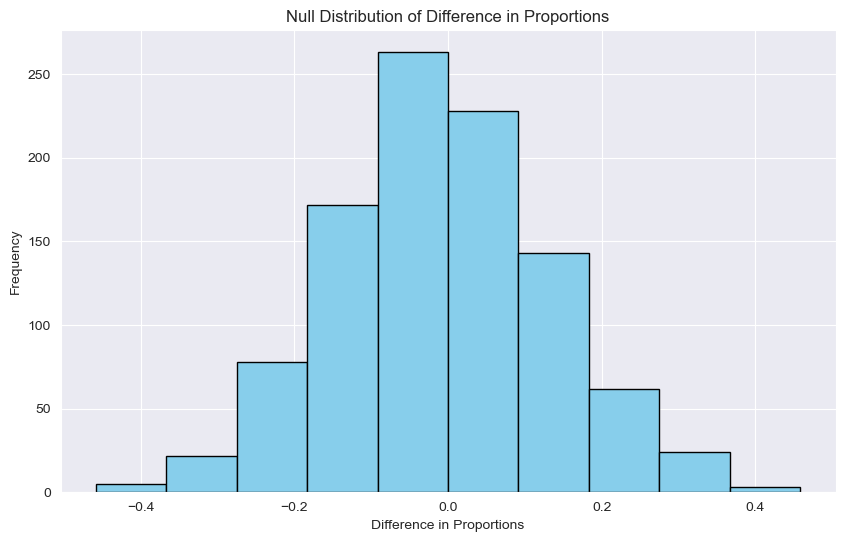

In [29]:
import matplotlib.pyplot as plt

# Plotting the histogram of the null distribution
plt.figure(figsize=(10, 6))
plt.hist(null_distribution_df['stat'], bins=10, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Difference in Proportions')
plt.ylabel('Frequency')
plt.title('Null Distribution of Difference in Proportions')

# Show the plot
plt.show()

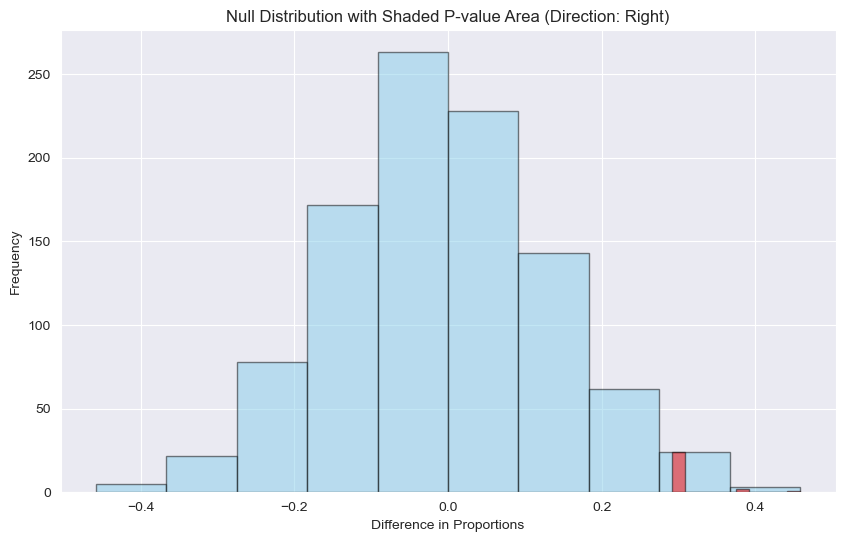

In [30]:
# Plotting the histogram of the null distribution
plt.figure(figsize=(10, 6))
plt.hist(null_distribution_df['stat'], bins=10, color='skyblue', edgecolor='black', alpha=0.5)

# Shading the p-value area
p_value_area = [x for x in null_distribution_df['stat'] if x >= obs_diff_prop]
plt.hist(p_value_area, bins=10, color='red', edgecolor='black', alpha=0.5)

# Adding labels and title
plt.xlabel('Difference in Proportions')
plt.ylabel('Frequency')
plt.title('Null Distribution with Shaded P-value Area (Direction: Right)')

# Show the plot
plt.show()

In [31]:
# Calculate the p-value
p_value = sum(x >= obs_diff_prop for x in null_distribution_df['stat']) / len(null_distribution_df['stat'])
p_value

0.027

In [32]:
import numpy as np
import pandas as pd

# Assuming promotions_df is already loaded with the promotions data

# Function to perform a permutation and calculate the difference in proportions
def calculate_diff_in_proportions_permutation(data, replicate_num):
    shuffled_decision = np.random.permutation(data['decision'])
    permuted_df = data.copy()
    permuted_df['decision'] = shuffled_decision
    promoted_counts = permuted_df[permuted_df['decision'] == 'promoted']['gender'].value_counts()
    total_counts = permuted_df['gender'].value_counts()
    proportions = promoted_counts / total_counts
    diff_in_props = proportions['male'] - proportions['female']
    return replicate_num, diff_in_props

# Set a seed for reproducibility
np.random.seed(2019)

# Generate the null distribution
null_distribution_data = [calculate_diff_in_proportions_permutation(promotions_df, i + 1) for i in range(1000)]

# Creating a DataFrame for the null distribution
null_distribution_df = pd.DataFrame(null_distribution_data, columns=['replicate', 'stat'])

null_distribution_df.head(10)

,replicate,stat
0,1,0.041667
1,2,0.041667
2,3,-0.041667
3,4,-0.125000
4,5,0.041667
5,6,-0.041667
6,7,0.041667
7,8,-0.041667
8,9,0.041667
9,10,-0.041667


In [34]:
# Load the data
file_path = 'data/promotions.csv'
promotions_df = pd.read_csv(file_path)

# Function to calculate the difference in proportions for a bootstrap sample
def calculate_diff_in_proportions_bootstrap(data):
    # Bootstrap sample
    bootstrap_sample = data.sample(frac=1, replace=True)
    promoted_counts = bootstrap_sample[bootstrap_sample['decision'] == 'promoted']['gender'].value_counts()
    total_counts = bootstrap_sample['gender'].value_counts()
    proportions = promoted_counts / total_counts
    diff_in_props = proportions['male'] - proportions['female']
    return diff_in_props

# Set a seed for reproducibility
np.random.seed(2019)

# Generate the bootstrap distribution
bootstrap_distribution = [calculate_diff_in_proportions_bootstrap(promotions_df) for _ in range(1000)]

# Display the first 10 values of the bootstrap distribution
bootstrap_distribution[:10]

[0.031746031746031744,
 0.25,
 0.41666666666666674,
 0.24825174825174823,
 0.27404718693284935,
 0.26375711574952565,
 0.23949579831932766,
 0.3321678321678322,
 0.20833333333333326,
 0.1460869565217391]

In [35]:
# Creating a DataFrame for the bootstrap distribution with replicate numbers and stats
bootstrap_distribution_df = pd.DataFrame({
    'replicate': range(1, 1001),
    'stat': bootstrap_distribution
})

# Display the first 10 rows of the DataFrame
bootstrap_distribution_df.head(10)

,replicate,stat
0,1,0.031746
1,2,0.250000
2,3,0.416667
3,4,0.248252
4,5,0.274047
5,6,0.263757
6,7,0.239496
7,8,0.332168
8,9,0.208333
9,10,0.146087


In [36]:
bootstrap_distribution_df.shape

(1000, 2)

In [38]:
import numpy as np

# Calculate the 95% percentile confidence interval
lower_bound = np.percentile(bootstrap_distribution_df['stat'], 2.5)
upper_bound = np.percentile(bootstrap_distribution_df['stat'], 97.5)

percentile_ci = (lower_bound, upper_bound)
percentile_ci

(0.060736714975845506, 0.5185185185185186)

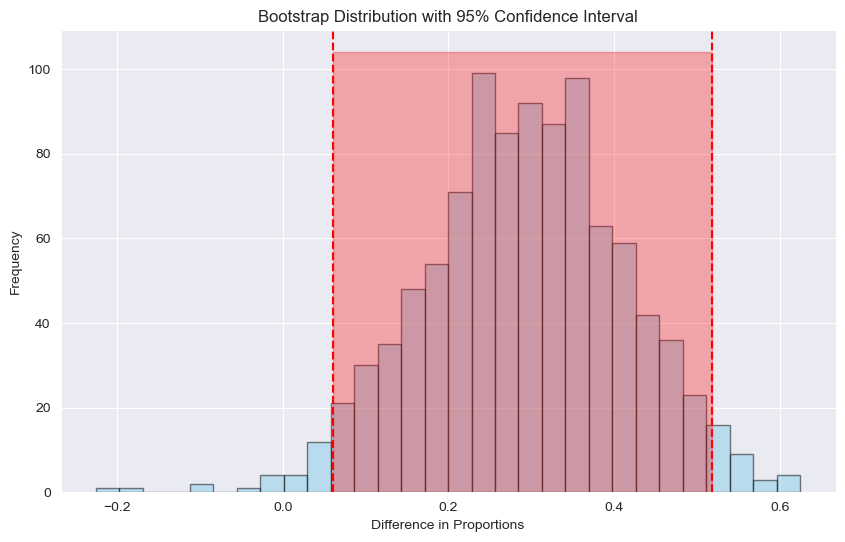

In [39]:
import matplotlib.pyplot as plt

# Plotting the histogram of the bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_distribution_df['stat'], bins=30, color='skyblue', edgecolor='black', alpha=0.5)

# Shading the confidence interval
plt.axvline(x=percentile_ci[0], color='red', linestyle='--')
plt.axvline(x=percentile_ci[1], color='red', linestyle='--')
plt.fill_betweenx([0, plt.ylim()[1]], percentile_ci[0], percentile_ci[1], color='red', alpha=0.3)

# Adding labels and title
plt.xlabel('Difference in Proportions')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution with 95% Confidence Interval')

# Show the plot
plt.show()

In [40]:
# Calculate the standard error of the bootstrap distribution
se = np.std(bootstrap_distribution_df['stat'])

# Calculate the 95% confidence interval using the standard error method
se_ci_lower = obs_diff_prop - 1.96 * se
se_ci_upper = obs_diff_prop + 1.96 * se
se_ci = (se_ci_lower, se_ci_upper)
se_ci

(0.0556026291908365, 0.5277307041424968)

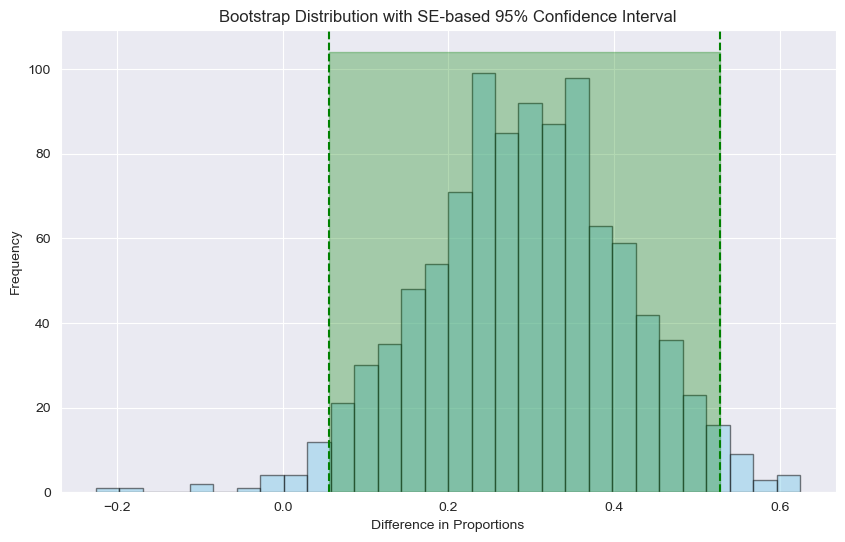

In [41]:
# Plotting the histogram of the bootstrap distribution with shaded SE-based confidence interval
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_distribution_df['stat'], bins=30, color='skyblue', edgecolor='black', alpha=0.5)

# Shading the confidence interval based on standard error
plt.axvline(x=se_ci[0], color='green', linestyle='--')
plt.axvline(x=se_ci[1], color='green', linestyle='--')
plt.fill_betweenx([0, plt.ylim()[1]], se_ci[0], se_ci[1], color='green', alpha=0.3)

# Adding labels and title
plt.xlabel('Difference in Proportions')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution with SE-based 95% Confidence Interval')

# Show the plot
plt.show()

In [42]:
# Function to perform a permutation and calculate the difference in proportions
def calculate_diff_in_proportions_permutation(data, replicate_num):
    shuffled_decision = np.random.permutation(data['decision'])
    permuted_df = data.copy()
    permuted_df['decision'] = shuffled_decision
    promoted_counts = permuted_df[permuted_df['decision'] == 'promoted']['gender'].value_counts()
    total_counts = permuted_df['gender'].value_counts()
    proportions = promoted_counts / total_counts
    diff_in_props = proportions['male'] - proportions['female']
    return replicate_num, diff_in_props

# Set a seed for reproducibility
np.random.seed(2019)

# Generate the null distribution
null_distribution_prop = [calculate_diff_in_proportions_permutation(promotions_df, i + 1) for i in range(1000)]

# Creating a DataFrame for the null distribution
null_distribution_prop_df = pd.DataFrame(null_distribution_prop, columns=['replicate', 'stat'])

# Display the first 10 rows of the null distribution DataFrame
null_distribution_prop_df.head(10)

,replicate,stat
0,1,0.041667
1,2,0.041667
2,3,-0.041667
3,4,-0.125000
4,5,0.041667
5,6,-0.041667
6,7,0.041667
7,8,-0.041667
8,9,0.041667
9,10,-0.041667


In [43]:
from scipy.stats import chi2_contingency

# Function to perform a permutation and calculate the chi-squared statistic
def calculate_chi_squared_permutation(data, replicate_num):
    # Permuting the 'decision' column
    shuffled_decision = np.random.permutation(data['decision'])
    permuted_df = data.copy()
    permuted_df['decision'] = shuffled_decision
    
    # Creating a contingency table
    contingency_table = pd.crosstab(permuted_df['gender'], permuted_df['decision'])
    
    # Calculating the Chi-square statistic
    chi2, p = chi2_contingency(contingency_table)[:2]
    return replicate_num, chi2

# Generate the null distribution for chi-squared
null_distribution_chi_squared = [calculate_chi_squared_permutation(promotions_df, i + 1) for i in range(1000)]

# Creating a DataFrame for the null distribution
null_distribution_chi_squared_df = pd.DataFrame(null_distribution_chi_squared, columns=['replicate', 'stat'])

# Display the first 10 rows of the null distribution DataFrame
null_distribution_chi_squared_df.head(10)

,replicate,stat
0,1,0.000000
1,2,0.000000
2,3,0.000000
3,4,0.000000
4,5,0.421978
5,6,1.687912
6,7,0.000000
7,8,0.000000
8,9,0.000000
9,10,0.000000


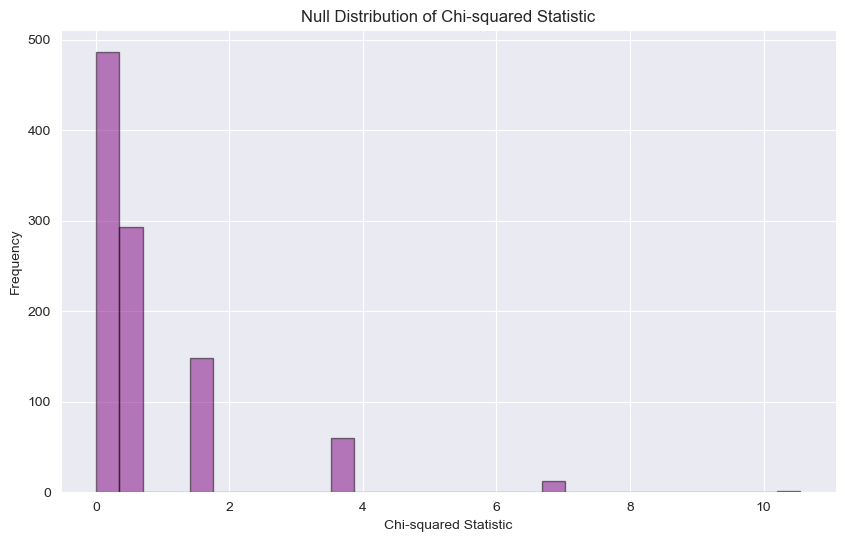

In [44]:
# Plotting the histogram of the null distribution for the Chi-squared statistic
plt.figure(figsize=(10, 6))
plt.hist(null_distribution_chi_squared_df['stat'], bins=30, color='purple', edgecolor='black', alpha=0.5)

# Adding labels and title
plt.xlabel('Chi-squared Statistic')
plt.ylabel('Frequency')
plt.title('Null Distribution of Chi-squared Statistic')

# Show the plot
plt.show()

In [45]:
# Performing the Chi-square test on the promotions dataset
chi2_stat, p, dof, expected = chi2_contingency(contingency_table)

# Printing the result
result = {
    "Chi-squared Statistic": chi2_stat,
    "P-value": p,
    "Degrees of Freedom": dof,
    "Expected Frequencies": expected
}
result

{'Chi-squared Statistic': 3.7978021978021976,
 'P-value': 0.05131990358807137,
 'Degrees of Freedom': 1,
 'Expected Frequencies': array([[ 6.5, 17.5],
        [ 6.5, 17.5]])}

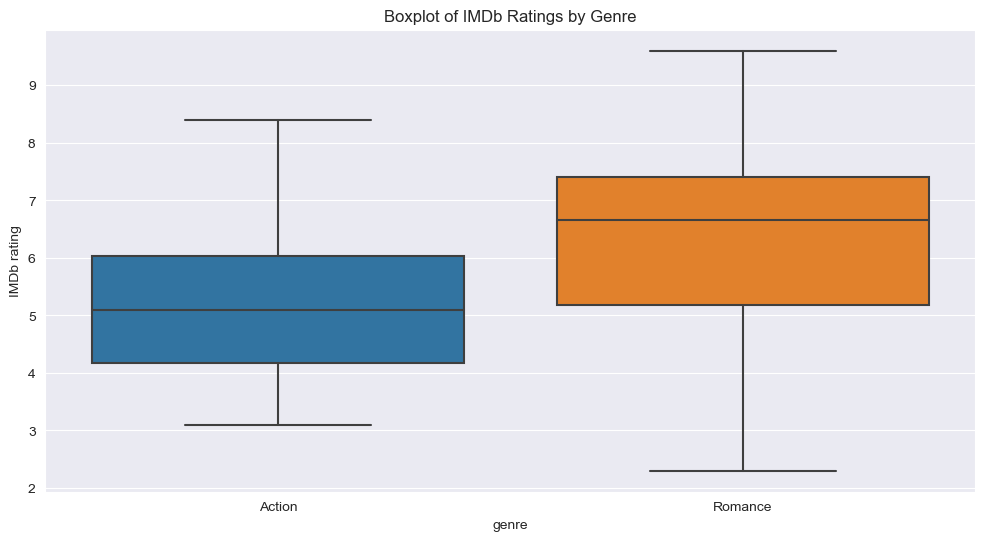

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sample data
movies_sample_file_path = 'data/movies_sample.csv'
movies_sample_df = pd.read_csv(movies_sample_file_path)

# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=movies_sample_df, x='genre', y='rating')

# Set labels and title
plt.ylabel('IMDb rating')
plt.title('Boxplot of IMDb Ratings by Genre')

# Show the plot
plt.show()

In [48]:
# Grouping by genre and calculating summary statistics
grouped_movies = movies_sample_df.groupby('genre').agg(
    n=('rating', 'count'),
    mean_rating=('rating', 'mean'),
    std_dev=('rating', 'std')
).reset_index()

grouped_movies

,genre,n,mean_rating,std_dev
0,Action,32,5.275000,1.361214
1,Romance,36,6.322222,1.609634


In [49]:
# Define the response (y) and explanatory (x) variables
y = movies_sample_df['rating']
x = movies_sample_df['genre']
x

0      Action
1     Romance
2     Romance
3     Romance
4      Action
       ...   
63    Romance
64     Action
65     Action
66    Romance
67     Action
Name: genre, Length: 68, dtype: object

In [50]:
# Display the first 10 rows of the movies_sample dataset with 'rating' and 'genre' columns
movies_sample_df[['rating', 'genre']].head(10)

,rating,genre
0,3.1,Action
1,6.3,Romance
2,6.8,Romance
3,5.0,Romance
4,4.0,Action
5,4.9,Romance
6,7.4,Romance
7,3.5,Action
8,7.7,Romance
9,5.8,Romance


In [51]:
movies_sample_df[['rating', 'genre']].shape

(68, 2)

In [53]:
# Display the first 10 rows of the movies_sample dataset with 'rating' and 'genre' columns
movies_sample_df[['rating', 'genre']].head(10)

,rating,genre
0,3.1,Action
1,6.3,Romance
2,6.8,Romance
3,5.0,Romance
4,4.0,Action
5,4.9,Romance
6,7.4,Romance
7,3.5,Action
8,7.7,Romance
9,5.8,Romance


In [54]:
# Function to perform a single permutation
def perform_permutation(data):
    shuffled_ratings = np.random.permutation(data['rating'])
    permuted_df = data.copy()
    permuted_df['rating'] = shuffled_ratings
    return permuted_df

# Generate 1000 permutations
permuted_data = [perform_permutation(movies_sample_df) for _ in range(1000)]

# Concatenate all DataFrames into a single DataFrame for viewing
permuted_data_combined = pd.concat(permuted_data, ignore_index=True)

# Display the first few rows of the combined DataFrame
permuted_data_combined.head()

,title,year,rating,genre
0,Underworld,1985,7.1,Action
1,Love Affair,1932,6.6,Romance
2,Junglee,1961,7.1,Romance
3,"Eversmile, New Jersey",1989,5.2,Romance
4,Search and Destroy,1979,8.0,Action


In [57]:
# Re-importing the movies_sample dataset
movies_sample_df = pd.read_csv('data/movies_sample.csv')

# Function to calculate the difference in means for a permutation
def calculate_diff_in_means_permutation(data):
    shuffled_ratings = np.random.permutation(data['rating'])
    permuted_df = data.copy()
    permuted_df['rating'] = shuffled_ratings

    # Calculating the mean for each genre
    means = permuted_df.groupby('genre')['rating'].mean()
    diff_in_means = means['Action'] - means['Romance']
    return diff_in_means

# Generate the null distribution for difference in means
null_distribution_movies = [calculate_diff_in_means_permutation(movies_sample_df) for _ in range(1000)]

# Creating a DataFrame for the null distribution with replicate numbers and stats
null_distribution_movies_df = pd.DataFrame({
    'replicate': range(1, 1001),
    'stat': null_distribution_movies
})

# Display the first 10 rows of the null distribution DataFrame
null_distribution_movies_df.head(10)

,replicate,stat
0,1,-0.008333
1,2,0.416667
2,3,-0.209028
3,4,0.180556
4,5,-0.043750
5,6,0.393056
6,7,0.080208
7,8,0.564236
8,9,0.151042
9,10,0.457986


In [59]:
# Re-importing the movies_sample dataset
movies_sample_df = pd.read_csv('data/movies_sample.csv')

# Calculate the observed difference in means between the genres
obs_diff_means = movies_sample_df.groupby('genre')['rating'].mean()['Action'] - \
                movies_sample_df.groupby('genre')['rating'].mean()['Romance']

obs_diff_means

-1.0472222222222216

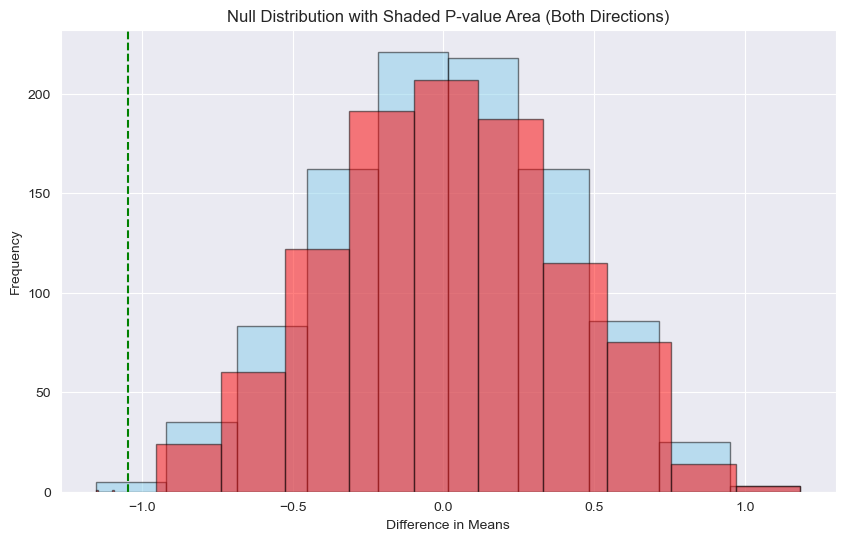

In [60]:
import matplotlib.pyplot as plt

# Plotting the histogram of the null distribution
plt.figure(figsize=(10, 6))
plt.hist(null_distribution_movies, bins=10, color='skyblue', edgecolor='black', alpha=0.5)

# Shading the p-value area for a two-tailed test
p_value_area_left = [x for x in null_distribution_movies if x <= obs_diff_means]
p_value_area_right = [x for x in null_distribution_movies if x >= obs_diff_means]
plt.hist(p_value_area_left, bins=10, color='red', edgecolor='black', alpha=0.5)
plt.hist(p_value_area_right, bins=10, color='red', edgecolor='black', alpha=0.5)

# Adding a line for the observed statistic
plt.axvline(x=obs_diff_means, color='green', linestyle='--')

# Adding labels and title
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.title('Null Distribution with Shaded P-value Area (Both Directions)')

# Show the plot
plt.show()

In [61]:
# Assuming null_distribution_movies is a list of your permutation results
# and obs_diff_means is your observed difference in means

# Calculate the two-tailed p-value
extreme_values_count = sum(abs(x) >= abs(obs_diff_means) for x in null_distribution_movies)
p_value_two_tailed = extreme_values_count / 1000  # Replace 1000 with the actual number of permutations

print(p_value_two_tailed)

0.004


In [62]:
# Assuming null_distribution_movies is a list of your permutation results
# and obs_diff_means is your observed difference in means

# Calculate the two-tailed p-value
extreme_values_count = sum(abs(x) >= abs(obs_diff_means) for x in null_distribution_movies)
p_value_movies = extreme_values_count / len(null_distribution_movies)

# Round the p-value to three decimal places
p_value_movies_rounded = round(p_value_movies, 3)

print(p_value_movies_rounded)

0.004


In [63]:
# Re-importing the movies_sample dataset
movies_sample_df = pd.read_csv('data/movies_sample.csv')

# Grouping by genre and calculating summary statistics
grouped_movies = movies_sample_df.groupby('genre').agg(
    n=('rating', 'count'),
    mean_rating=('rating', 'mean'),
    std_dev=('rating', 'std')
).reset_index()

grouped_movies

,genre,n,mean_rating,std_dev
0,Action,32,5.275000,1.361214
1,Romance,36,6.322222,1.609634


In [66]:
import pandas as pd
import numpy as np

# Load the data
movies_sample_df = pd.read_csv('data/movies_sample.csv')  # replace with your file path

# Function to calculate the difference in means for a permutation
def calculate_diff_in_means_permutation(data):
    shuffled_ratings = np.random.permutation(data['rating'])
    permuted_df = data.copy()
    permuted_df['rating'] = shuffled_ratings

    # Calculating the mean for each genre
    means = permuted_df.groupby('genre')['rating'].mean()
    diff_in_means = means['Action'] - means['Romance']
    return diff_in_means

# Generate the null distribution for difference in means
null_distribution_movies = [calculate_diff_in_means_permutation(movies_sample_df) for _ in range(1000)]

# Creating a DataFrame for the null distribution with replicate numbers and stats
null_distribution_movies_df = pd.DataFrame({
    'replicate': range(1, 1001),
    'stat': null_distribution_movies
})

# Display the first 10 rows of the null distribution DataFrame
print(null_distribution_movies_df.head(10))

   replicate      stat
0          1  0.564236
1          2  0.357639
2          3  0.334028
3          4 -0.580903
4          5  0.528819
5          6 -0.480556
6          7  0.215972
7          8 -0.321181
8          9  0.511111
9         10  0.546528


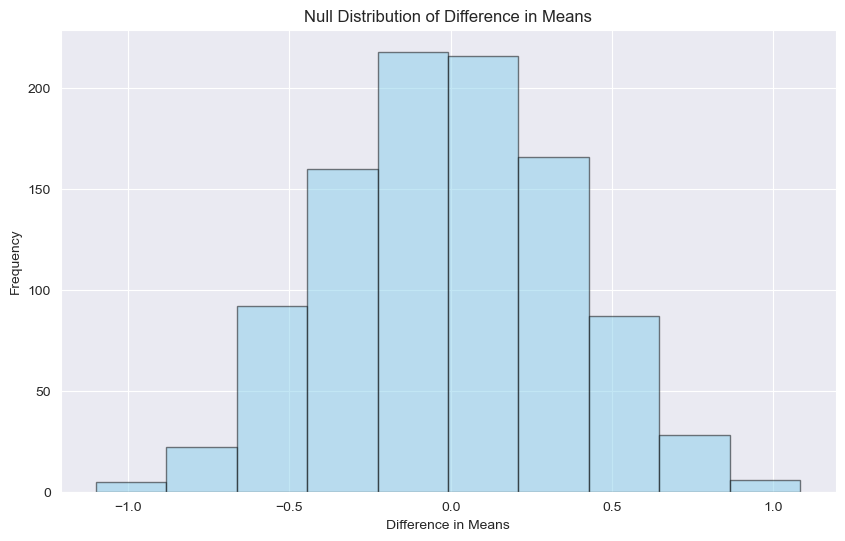

In [67]:
# Plotting the histogram of the null distribution for the difference in means
plt.figure(figsize=(10, 6))
plt.hist(null_distribution_movies, bins=10, color='skyblue', edgecolor='black', alpha=0.5)

# Adding labels and title
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.title('Null Distribution of Difference in Means')

# Show the plot
plt.show()

In [68]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Load the data
movies_sample_df = pd.read_csv('data/movies_sample.csv')  

# Function to perform a permutation and calculate the t-statistic
def calculate_t_stat_permutation(data):
    shuffled_ratings = np.random.permutation(data['rating'])
    permuted_df = data.copy()
    permuted_df['rating'] = shuffled_ratings

    # Separating the ratings for each genre
    action_ratings = permuted_df[permuted_df['genre'] == 'Action']['rating']
    romance_ratings = permuted_df[permuted_df['genre'] == 'Romance']['rating']

    # Calculating the t-statistic
    t_stat, p_val = ttest_ind(action_ratings, romance_ratings, equal_var=False)
    return t_stat

# Generate the null distribution for the t-statistic
null_distribution_movies_t = [calculate_t_stat_permutation(movies_sample_df) for _ in range(1000)]

# First 10 values of the null distribution
null_distribution_movies_t[:10]

[-0.6477466879385548,
 -0.3309961141010745,
 0.2061500006287306,
 -0.4762269656706333,
 0.07020974080640525,
 -0.957727903990707,
 0.6121762008019012,
 -0.44448929253834696,
 -0.2327546286491092,
 0.6025253232143687]

In [69]:
# Re-importing the movies_sample dataset
movies_sample_df = pd.read_csv('data/movies_sample.csv')

# Function to perform a permutation and calculate the t-statistic
def calculate_t_stat_permutation(data):
    shuffled_ratings = np.random.permutation(data['rating'])
    permuted_df = data.copy()
    permuted_df['rating'] = shuffled_ratings

    # Separating the ratings for each genre
    action_ratings = permuted_df[permuted_df['genre'] == 'Action']['rating']
    romance_ratings = permuted_df[permuted_df['genre'] == 'Romance']['rating']

    # Calculating the t-statistic
    t_stat, p_val = ttest_ind(action_ratings, romance_ratings, equal_var=False)
    return t_stat

# Generate the null distribution for the t-statistic
null_distribution_movies_t = [calculate_t_stat_permutation(movies_sample_df) for _ in range(1000)]

# Creating a DataFrame for the null distribution with replicate numbers and stats
null_distribution_movies_t_df = pd.DataFrame({
    'replicate': range(1, 1001),
    'stat': null_distribution_movies_t
})

# Display the first 10 rows of the null distribution DataFrame
null_distribution_movies_t_df.head(10)


,replicate,stat
0,1,-0.378996
1,2,0.148676
2,3,0.239489
3,4,0.894066
4,5,0.129835
5,6,0.676878
6,7,0.244899
7,8,0.696318
8,9,-1.151374
9,10,1.865106


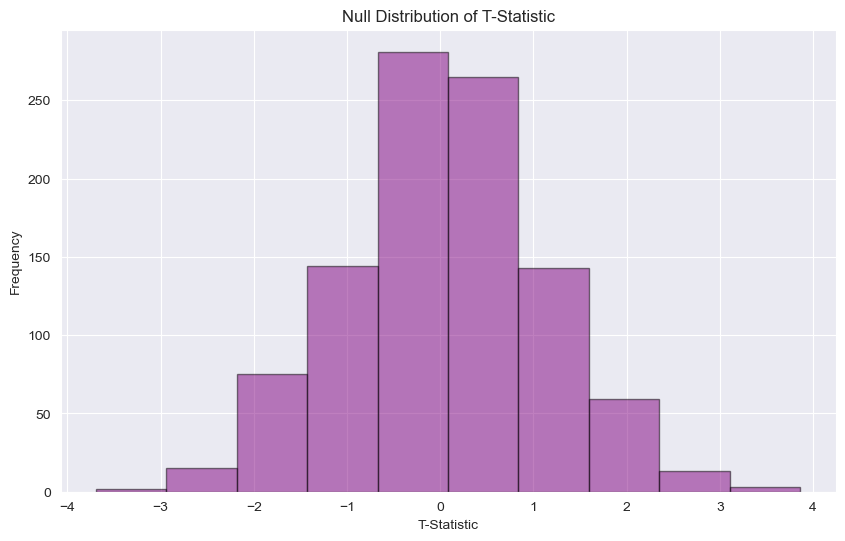

In [70]:
# Plotting the histogram of the null distribution for the t-statistic
plt.figure(figsize=(10, 6))
plt.hist(null_distribution_movies_t, bins=10, color='purple', edgecolor='black', alpha=0.5)

# Adding labels and title
plt.xlabel('T-Statistic')
plt.ylabel('Frequency')
plt.title('Null Distribution of T-Statistic')

# Show the plot
plt.show()

NameError: name 'obs_t_stat' is not defined

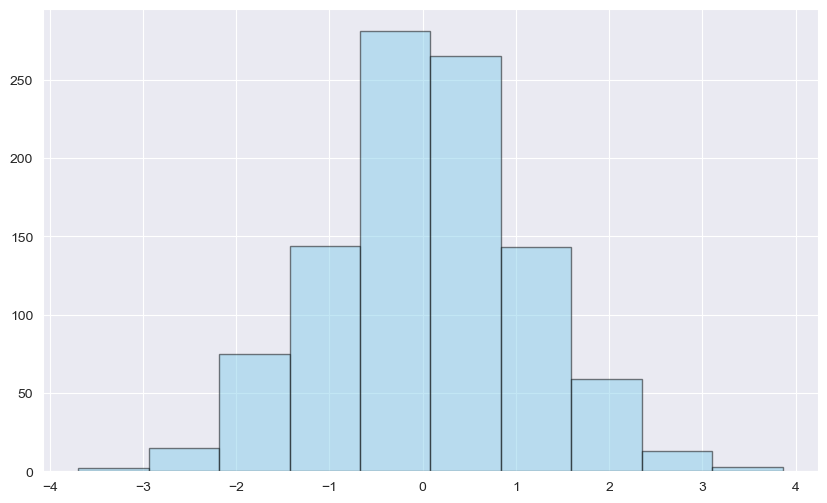

In [71]:
import matplotlib.pyplot as plt

# Assuming null_distribution_movies_t is a list of t-statistics from permutations
# and obs_t_stat is your observed t-statistic

# Plotting the histogram of the null distribution
plt.figure(figsize=(10, 6))
plt.hist(null_distribution_movies_t, bins=10, color='skyblue', edgecolor='black', alpha=0.5)

# Adding a line for the observed t-statistic
plt.axvline(x=obs_t_stat, color='red', linestyle='--')
plt.axvline(x=-obs_t_stat, color='red', linestyle='--')  # For two-sided test

# Adding labels and title
plt.xlabel('T-Statistic')
plt.ylabel('Frequency')
plt.title('Null Distribution of T-Statistic with Observed Statistic')

# Show the plot
plt.show()

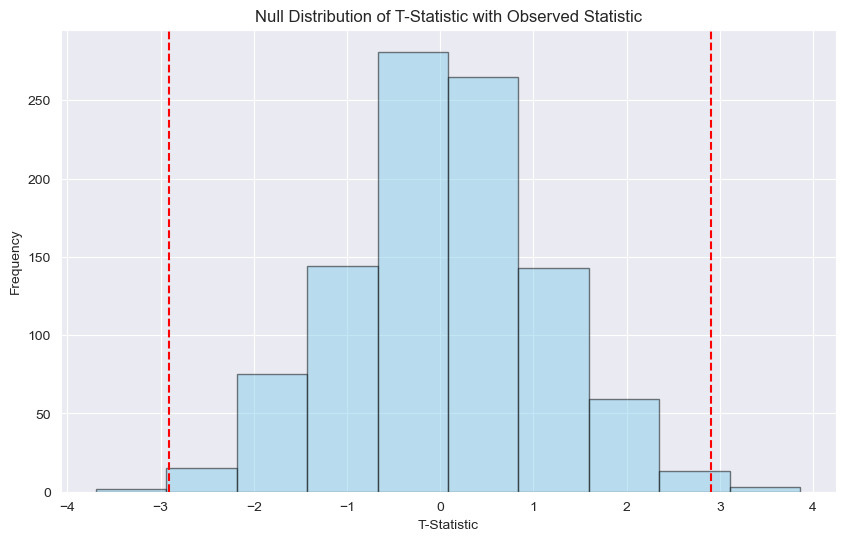

In [72]:
from scipy.stats import ttest_ind

# Calculating the observed t-statistic for the original data
action_ratings = movies_sample_df[movies_sample_df['genre'] == 'Action']['rating']
romance_ratings = movies_sample_df[movies_sample_df['genre'] == 'Romance']['rating']
obs_t_stat, _ = ttest_ind(action_ratings, romance_ratings, equal_var=False)

# Plotting the histogram of the null distribution
plt.figure(figsize=(10, 6))
plt.hist(null_distribution_movies_t, bins=10, color='skyblue', edgecolor='black', alpha=0.5)

# Adding lines for the observed t-statistic
plt.axvline(x=obs_t_stat, color='red', linestyle='--')
plt.axvline(x=-obs_t_stat, color='red', linestyle='--')  # For two-sided test

# Adding labels and title
plt.xlabel('T-Statistic')
plt.ylabel('Frequency')
plt.title('Null Distribution of T-Statistic with Observed Statistic')

# Show the plot
plt.show()

In [73]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Separating the ratings for each genre
action_ratings = movies_sample_df[movies_sample_df['genre'] == 'Action']['rating']
romance_ratings = movies_sample_df[movies_sample_df['genre'] == 'Romance']['rating']

# Calculating the observed two-sample t-statistic
obs_two_sample_t, _ = ttest_ind(action_ratings, romance_ratings, equal_var=False)

print("Observed two-sample t-statistic:", obs_two_sample_t)

Observed two-sample t-statistic: -2.905888900417668


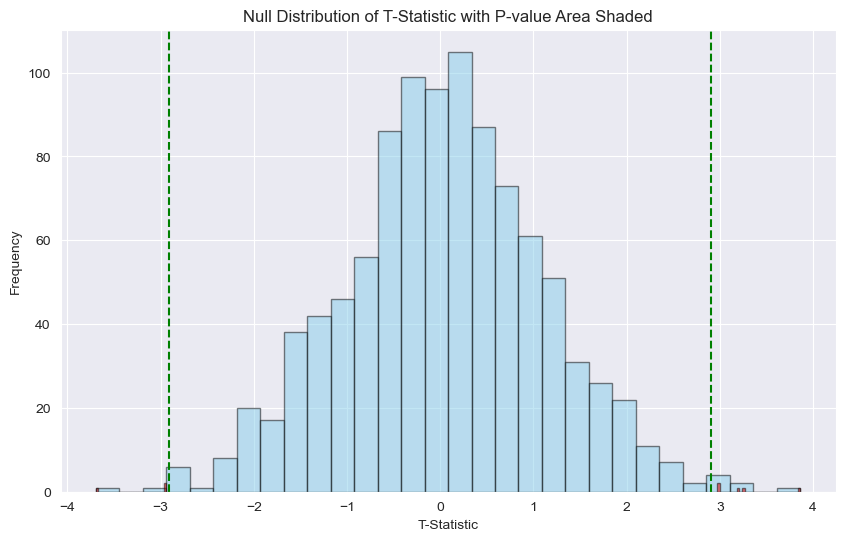

In [74]:
import matplotlib.pyplot as plt

# Assuming null_distribution_movies_t is a list of t-statistics from permutations
# and obs_two_sample_t is your observed two-sample t-statistic

# Plotting the histogram of the null distribution
plt.figure(figsize=(10, 6))
plt.hist(null_distribution_movies_t, bins=30, color='skyblue', edgecolor='black', alpha=0.5)

# Shading the p-value area for a two-tailed test
p_value_area_left = [x for x in null_distribution_movies_t if x <= -abs(obs_two_sample_t)]
p_value_area_right = [x for x in null_distribution_movies_t if x >= abs(obs_two_sample_t)]
plt.hist(p_value_area_left, bins=30, color='red', edgecolor='black', alpha=0.5)
plt.hist(p_value_area_right, bins=30, color='red', edgecolor='black', alpha=0.5)

# Adding lines for the observed t-statistic
plt.axvline(x=obs_two_sample_t, color='green', linestyle='--')
plt.axvline(x=-obs_two_sample_t, color='green', linestyle='--')  # For two-tailed test

# Adding labels and title
plt.xlabel('T-Statistic')
plt.ylabel('Frequency')
plt.title('Null Distribution of T-Statistic with P-value Area Shaded')

# Show the plot
plt.show()


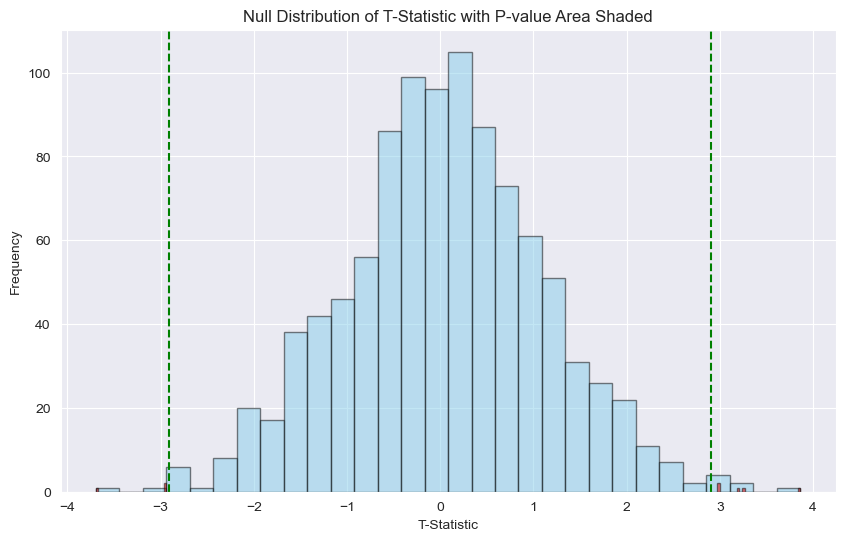

In [75]:
import matplotlib.pyplot as plt

# Assuming null_distribution_movies_t is a list of t-statistics from permutations
# and obs_two_sample_t is your observed two-sample t-statistic

# Plotting the histogram of the null distribution
plt.figure(figsize=(10, 6))
plt.hist(null_distribution_movies_t, bins=30, color='skyblue', edgecolor='black', alpha=0.5)

# Shading the p-value area for a two-tailed test
p_value_area_left = [x for x in null_distribution_movies_t if x <= -abs(obs_two_sample_t)]
p_value_area_right = [x for x in null_distribution_movies_t if x >= abs(obs_two_sample_t)]
plt.hist(p_value_area_left, bins=30, color='red', edgecolor='black', alpha=0.5)
plt.hist(p_value_area_right, bins=30, color='red', edgecolor='black', alpha=0.5)

# Adding lines for the observed t-statistic
plt.axvline(x=obs_two_sample_t, color='green', linestyle='--')
plt.axvline(x=-obs_two_sample_t, color='green', linestyle='--')  # For two-tailed test

# Adding labels and title
plt.xlabel('T-Statistic')
plt.ylabel('Frequency')
plt.title('Null Distribution of T-Statistic with P-value Area Shaded')

# Show the plot
plt.show()

In [76]:
# Importing necessary libraries
import pandas as pd

# Load the flights dataset
flights_file_path = 'data/flights.csv'
flights_df = pd.read_csv(flights_file_path)

# Filter for carriers "HA" and "AS"
flights_sample_df = flights_df[flights_df['carrier'].isin(['HA', 'AS'])]

# Display the first few rows of the filtered DataFrame
flights_sample_df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
78,2013,1,1,724.0,725,-1.0,1020.0,1030,-10.0,AS,11,N594AS,EWR,SEA,338.0,2402,7,25,2013-01-01 07:00:00
162,2013,1,1,857.0,900,-3.0,1516.0,1530,-14.0,HA,51,N380HA,JFK,HNL,659.0,4983,9,0,2013-01-01 09:00:00
644,2013,1,1,1808.0,1815,-7.0,2111.0,2130,-19.0,AS,7,N553AS,EWR,SEA,336.0,2402,18,15,2013-01-01 18:00:00
949,2013,1,2,722.0,725,-3.0,949.0,1030,-41.0,AS,11,N592AS,EWR,SEA,314.0,2402,7,25,2013-01-02 07:00:00
1073,2013,1,2,909.0,900,9.0,1525.0,1530,-5.0,HA,51,N380HA,JFK,HNL,638.0,4983,9,0,2013-01-02 09:00:00


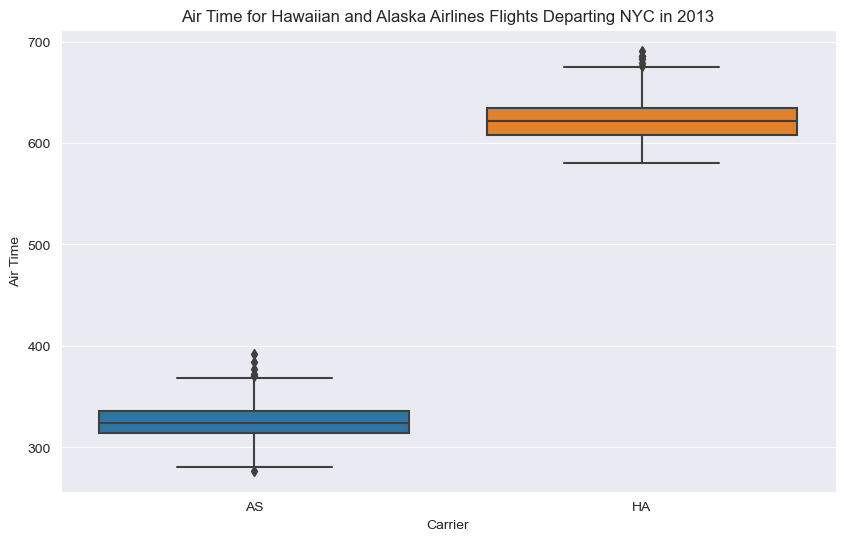

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Filter for carriers "HA" and "AS"
flights_sample_df = flights_df[flights_df['carrier'].isin(['HA', 'AS'])]

# Create a boxplot for air time by carrier
plt.figure(figsize=(10, 6))
sns.boxplot(data=flights_sample_df, x='carrier', y='air_time')

# Setting labels and title
plt.xlabel('Carrier')
plt.ylabel('Air Time')
plt.title('Air Time for Hawaiian and Alaska Airlines Flights Departing NYC in 2013')

# Show the plot
plt.show()

In [78]:
import pandas as pd

# Load the flights dataset
flights_file_path = 'data/flights.csv'  # Replace with the correct file path
flights_df = pd.read_csv(flights_file_path)

# Filter for carriers "HA" and "AS"
flights_sample_df = flights_df[flights_df['carrier'].isin(['HA', 'AS'])]

# Grouping by carrier and destination, and calculating summary statistics
grouped_flights = flights_sample_df.groupby(['carrier', 'dest']).agg(
    n=('air_time', 'count'),
    mean_time=('air_time', lambda x: x.mean(skipna=True))
).reset_index()

# Display the result
print(grouped_flights)

  carrier dest    n   mean_time
0      AS  SEA  709  325.617772
1      HA  HNL  342  623.087719


In [80]:
import pandas as pd
import statsmodels.api as sm

# Assuming evals_df is your DataFrame with the evals dataset
evals_df = pd.read_csv('data/evals.csv')  # Replace with the correct file path if needed

# Preparing the data for the model
X = evals_df['bty_avg']  # Explanatory variable
y = evals_df['score']    # Response variable

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fitting the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     16.73
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           5.08e-05
Time:                        20:01:35   Log-Likelihood:                -366.22
No. Observations:                 463   AIC:                             736.4
Df Residuals:                     461   BIC:                             744.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8803      0.076     50.961      0.0

In [82]:
import pandas as pd
import statsmodels.api as sm

# Preparing the data for the model
X = evals_df['bty_avg']  # Explanatory variable
y = evals_df['score']    # Response variable

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fitting the linear regression model
model = sm.OLS(y, X).fit()

# Get the regression table (summary)
regression_table = model.summary()
print(regression_table)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     16.73
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           5.08e-05
Time:                        20:06:31   Log-Likelihood:                -366.22
No. Observations:                 463   AIC:                             736.4
Df Residuals:                     461   BIC:                             744.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8803      0.076     50.961      0.0